In [12]:
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\User\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
iris = datasets.load_iris()
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [4]:
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns = ["Species"])

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Here, Iris datasets have three classes (Setosa, Versicolor, Virginica) = (0, 1, 2), and having 50
samples each

In [ ]:
X.shape

In [ ]:
y[105:110]

Fit the the above Decision Tree classifier instance

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## Hard Voting

Visualizing the built Decision Tree

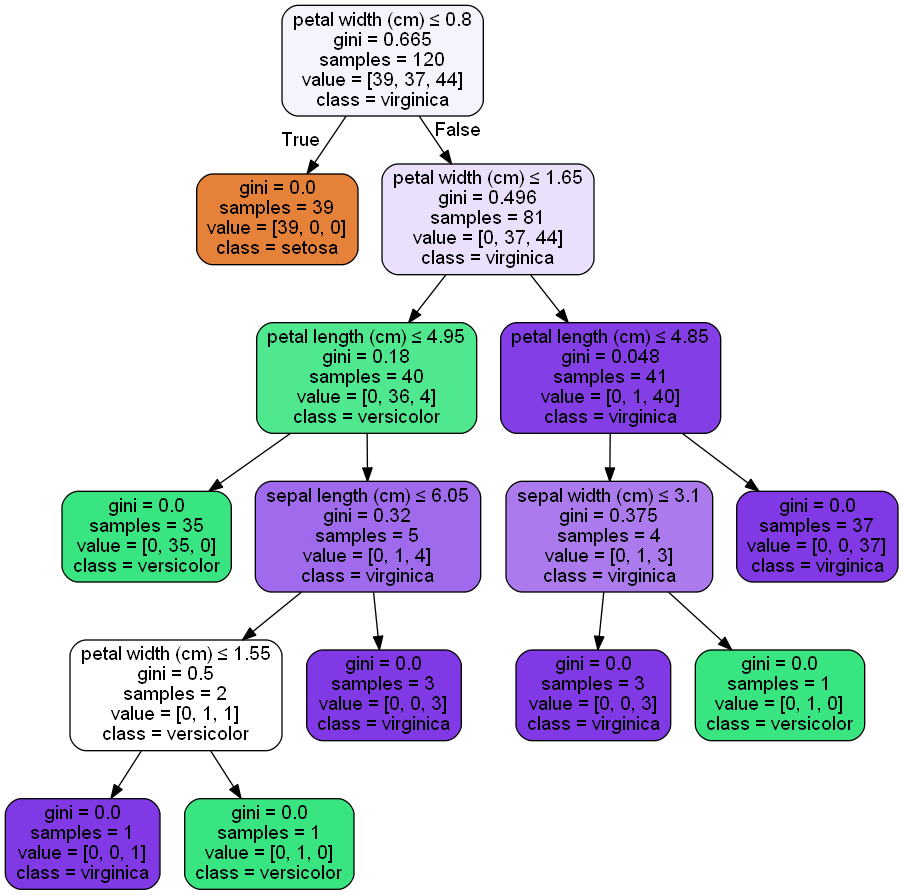

In [13]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names = list(X.columns), class_names = iris.target_names, filled = True, rounded = True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('deci_out2.png')   #  to save image file
Image(graph.create_png())

## Prediction

In [14]:
y_pred = tree_clf.predict(X_test)

In [15]:
# for any single instance
tree_clf.predict_proba([[5, 5, 2.6, 1.5]])

array([[0., 1., 0.]])

## Model Evaluation 

In [16]:
# Model Accuracy
print ("Accuracy = {} %".format(accuracy_score(y_test, y_pred)*100))

Accuracy = 96.66666666666667 %


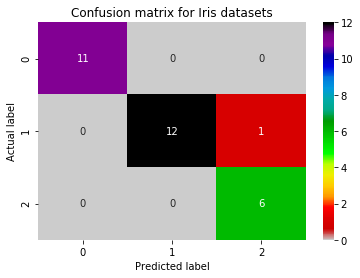

In [17]:
# Confusuion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
s = sns.heatmap(conf_mat, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Confusion matrix for Iris datasets')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
None

In [18]:
# Classification Report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

